# Diabetes Risk Prediction

## Problem statement

Diabetes is a condition that happens when your blood sugar (glucose) is too high. It develops when your pancreas doesn’t make enough insulin or any at all, or when your body isn’t responding to the effects of insulin properly.

Diabetes affects people of all ages. Most forms of diabetes are chronic (lifelong), and all forms are manageable with medications and/or lifestyle changes.

### Goal: to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

# 1. Data Collection

### Importing the dependancies¶

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')
sns.set(style='darkgrid')

 ###  Data Loading

In [184]:
df=pd.read_csv('../data/diabetes.csv')

In [185]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 2. EDA & Data Preprocessing

### Inspect the data

In [186]:
df.shape

(768, 9)

In [187]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### Observation:

We can see that columns like blood pressure, glucose, BMI have minimum value 0. 

Think about these features:
* BloodPressure: Can a living person have a blood pressure of 0 mm Hg? No.
* BMI (Body Mass Index): Can a living adult have a BMI of 0? No.

So we need to clean them 

### Data Cleaning

In [189]:
cols_with_zero=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[cols_with_zero]=df[cols_with_zero].replace(0,np.nan)

In [190]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [191]:
df.fillna(df.median(),inplace=True)

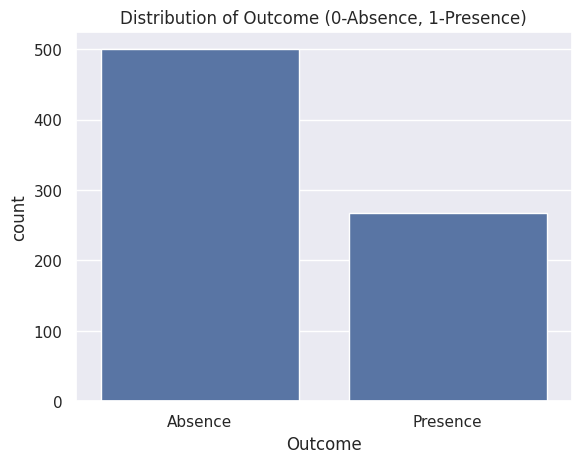

In [203]:
sns.countplot(x='Outcome',data=df)
plt.title("Distribution of Outcome (0-Absence, 1-Presence)")
plt.xticks(ticks=[0, 1], labels=['Absence', 'Presence'])

plt.show()

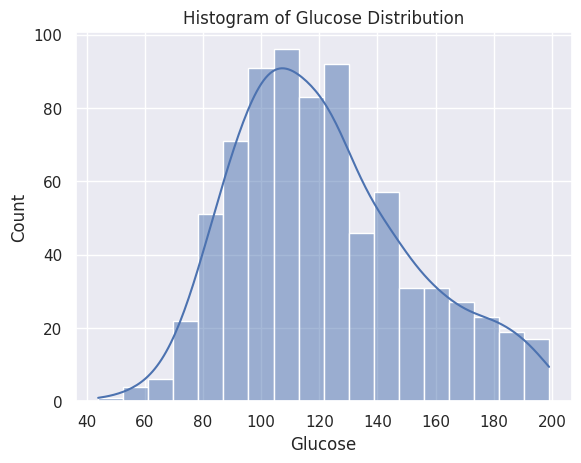

In [204]:
sns.histplot(df['Glucose'],kde=True)
plt.title('Histogram of Glucose Distribution')

plt.show()

Glucose levels are right-skewed, indicating most patients have low-to-moderate readings with a few extreme high cases likely representing diabetic individuals.

<Axes: xlabel='Outcome', ylabel='Glucose'>

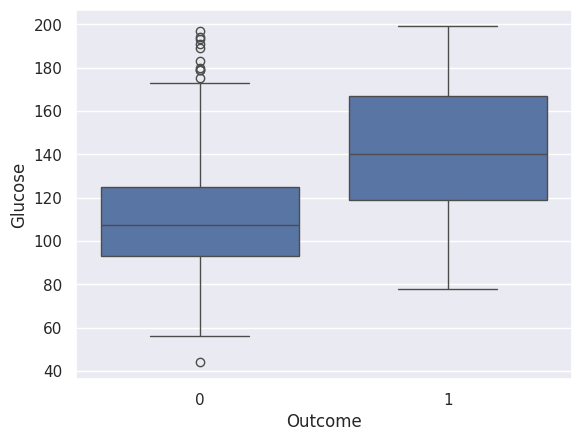

In [194]:
sns.boxplot(x='Outcome',y='Glucose',data=df)

<Axes: xlabel='Outcome', ylabel='Insulin'>

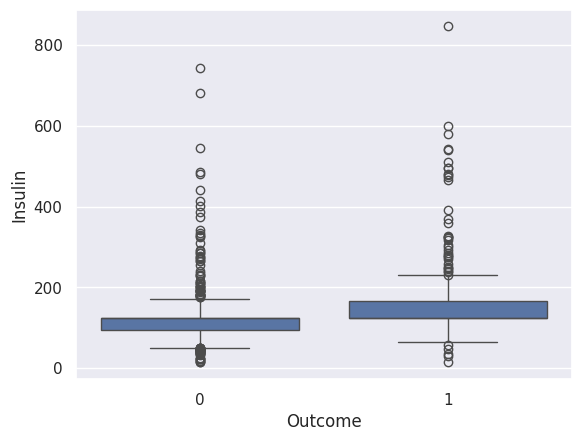

In [195]:
sns.boxplot(x='Outcome',y='Insulin',data=df)

<Axes: xlabel='Outcome', ylabel='Age'>

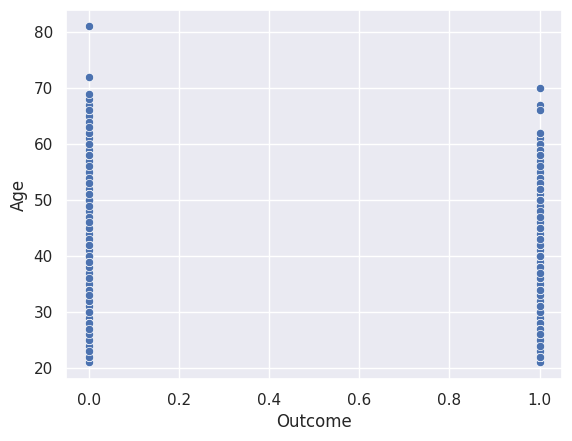

In [196]:
sns.scatterplot(x='Outcome', y='Age',data=df)

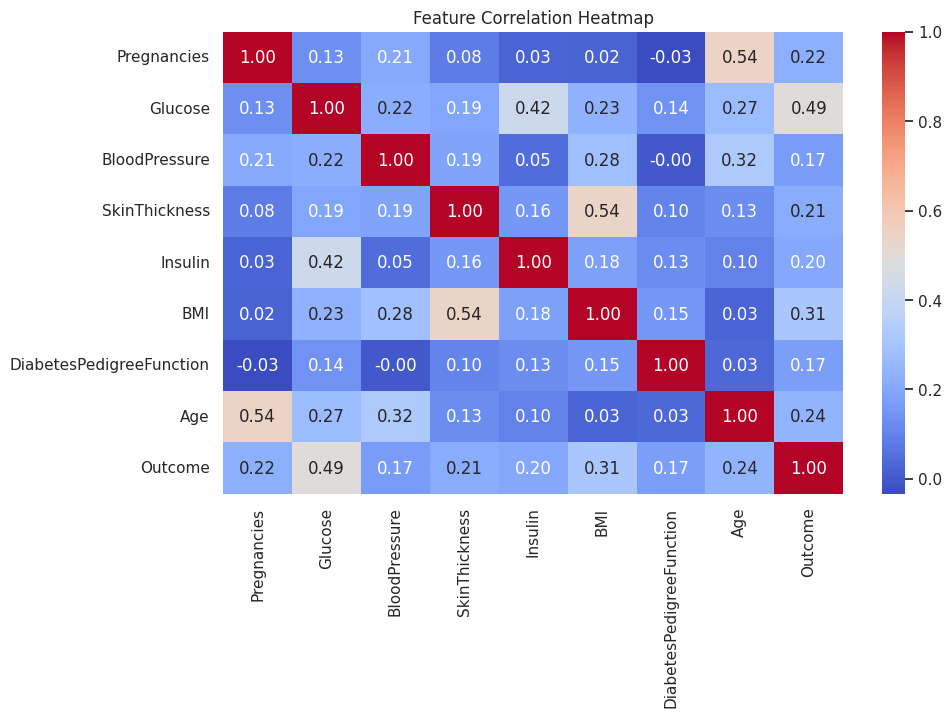

In [208]:
plt.figure(figsize=(10,6))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Feature Correlation Heatmap')
plt.show()